In [1]:
import pandas as pd 
import vpluslib 
from jinja2 import Template
import os,sys

current_path = os.getcwd()
parent_folder = os.path.dirname(current_path)
sys.path.append(parent_folder)

from commons import crud as cr

No module named 'cosmos'


In [2]:
import os,sys
current_path = os.getcwd()
parent_folder = os.path.dirname(current_path)
sys.path.append(parent_folder)

from model import model_nlp as mn 
from model.utils import preprocessing as pr

In [3]:
dwh_conn = vpluslib.connect_init(4)
query = Template('''
    SELECT 
        DATE(review_date) as review_date,
        review_star,
        review_text,
        app_version_name
    FROM analytics.gplayconsole_reviews
    WHERE review_text IS NOT NULL AND review_text != ''
     ''')
    
query = query.render()
df = pd.read_sql(query, dwh_conn)

/tmp/ipykernel_489323/315342790.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, dwh_conn)


In [ ]:
# df = mn.sentiment_analysis(df=df, column_name='review_text')
# df = pr.run_tokenizer(df=df, column_name='review_text')
# df.head()

Device set to use cpu


In [8]:
df

,review_date,review_star,review_text,app_version_name,review_text_clean,label_sentiment,review_text_token
0,2022-10-23,1,Ini kenapa ya klo nonton episode yg sudah lama...,6.20.0,ini kenapa ya klo nonton episode yg sudah lama...,negative,"[nonton, episode, tab, menit, loadingnya, munc..."
1,2022-10-23,5,Sangat baguss sekali,,sangat baguss sekali,positive,[baguss]
2,2022-10-23,1,Masih belum bisa nonton MotoGP live. Sudah gan...,6.20.0,masih belum bisa nonton motogp live sudah gant...,negative,"[nonton, motogp, live, ganti, provider, device..."
3,2022-10-23,1,Loading mulu gx bsa ke buka padahal pke wifi a...,6.20.0,loading mulu gx bsa ke buka padahal pke wifi a...,negative,"[loading, mulu, gx, bsa, buka, pke, wifi, pake..."
4,2022-10-23,1,Mohon untuk perbaikan applikasinya karena sela...,6.20.0,mohon untuk perbaikan applikasinya karena sela...,negative,"[mohon, baik, applikasinya, muncul, unable, to..."
...,...,...,...,...,...,...,...
38472,2024-04-29,1,Bad apps.,11.3.5 (1.2403231120) Vision+,bad apps,negative,"[bad, apps]"
38473,2024-04-29,1,2 kali langganan premium + sports 30 hari dan ...,11.3.5 (1.2403231120) Vision+,kali langganan premium sports hari dan semua n...,negative,"[kali, langgan, premium, sports, masuk, chat, ..."
38474,2024-04-29,1,Penipu....; refund uang kami. Jangan menipu ka...,11.3.5 (1.2403231120) Vision+,penipu refund uang kami jangan menipu kaya gin...,negative,"[tipu, refund, uang, tipu, kaya, gin, udah, su..."
38475,2024-04-29,1,Sangat buruk,,sangat buruk,negative,[buruk]


In [9]:
df.to_excel('test_sentiment.xlsx', index = False)

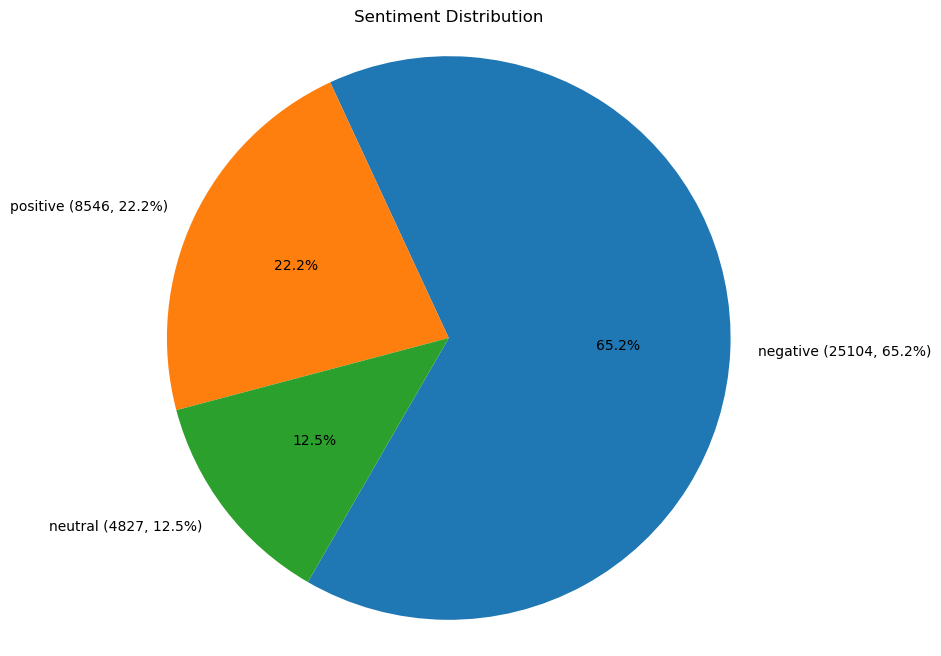

In [36]:
# Count values
sentiment_counts = df['label_sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=[f"{label} ({count}, {count / sentiment_counts.sum():.1%})" 
            for label, count in sentiment_counts.items()],
    autopct='%1.1f%%',
    startangle=240
)
plt.title('Sentiment Distribution')
plt.axis('equal')  
plt.show()

In [30]:
df_negative = df[df['label_sentiment']=='negative']
df_negative

,review_date,review_star,review_text,app_version_name,review_text_clean,label_sentiment,review_text_token
0,2022-10-23,1,Ini kenapa ya klo nonton episode yg sudah lama...,6.20.0,ini kenapa ya klo nonton episode yg sudah lama...,negative,"[nonton, episode, tab, menit, loadingnya, munc..."
2,2022-10-23,1,Masih belum bisa nonton MotoGP live. Sudah gan...,6.20.0,masih belum bisa nonton motogp live sudah gant...,negative,"[nonton, motogp, live, ganti, provider, device..."
3,2022-10-23,1,Loading mulu gx bsa ke buka padahal pke wifi a...,6.20.0,loading mulu gx bsa ke buka padahal pke wifi a...,negative,"[loading, mulu, gx, bsa, buka, pke, wifi, pake..."
4,2022-10-23,1,Mohon untuk perbaikan applikasinya karena sela...,6.20.0,mohon untuk perbaikan applikasinya karena sela...,negative,"[mohon, baik, applikasinya, muncul, unable, to..."
5,2022-10-23,1,Lihat channel lain oke; tapi lihat motogp seri...,6.20.0,lihat channel lain oke tapi lihat motogp serin...,negative,"[lihat, channel, oke, lihat, motogp, ngga, con..."
...,...,...,...,...,...,...,...
38472,2024-04-29,1,Bad apps.,11.3.5 (1.2403231120) Vision+,bad apps,negative,"[bad, apps]"
38473,2024-04-29,1,2 kali langganan premium + sports 30 hari dan ...,11.3.5 (1.2403231120) Vision+,kali langganan premium sports hari dan semua n...,negative,"[kali, langgan, premium, sports, masuk, chat, ..."
38474,2024-04-29,1,Penipu....; refund uang kami. Jangan menipu ka...,11.3.5 (1.2403231120) Vision+,penipu refund uang kami jangan menipu kaya gin...,negative,"[tipu, refund, uang, tipu, kaya, gin, udah, su..."
38475,2024-04-29,1,Sangat buruk,,sangat buruk,negative,[buruk]


In [31]:
df_negative['review_star'].value_counts()

1    21789
2     1591
3      810
5      611
4      303
Name: review_star, dtype: int64

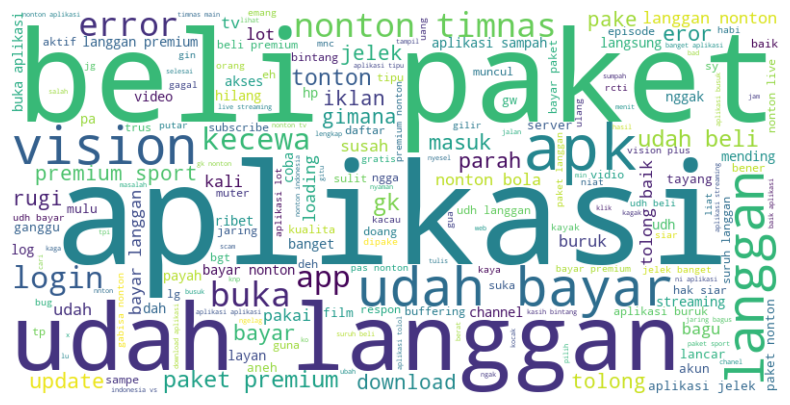

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of tokens into one list
all_words = [word for sublist in df_negative['review_text_token'] for word in sublist]

# Join all words into a single string
text = ' '.join(all_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

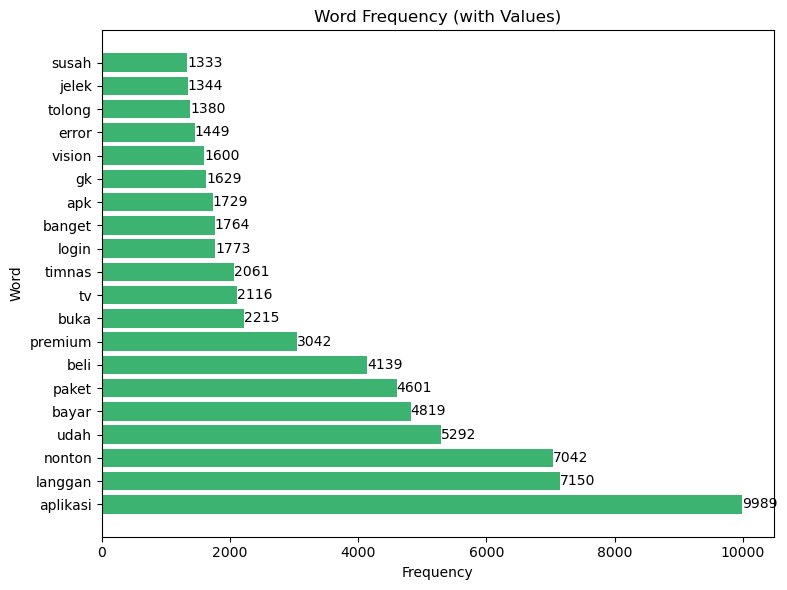

In [33]:
from collections import Counter

# Count word frequencies
word_counts = Counter(all_words)

# Convert to a DataFrame for easier plotting
freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
freq_df = freq_df.sort_values(by='count', ascending=False).head(20)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(freq_df['word'], freq_df['count'], color='mediumseagreen')

# Add value labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center')

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Word Frequency (with Values)')
plt.tight_layout()
plt.show()

In [40]:
df_r1 = df[df['review_star']==1]
df_r1

,review_date,review_star,review_text,app_version_name,review_text_clean,label_sentiment,review_text_token
0,2022-10-23,1,Ini kenapa ya klo nonton episode yg sudah lama...,6.20.0,ini kenapa ya klo nonton episode yg sudah lama...,negative,"[nonton, episode, tab, menit, loadingnya, munc..."
2,2022-10-23,1,Masih belum bisa nonton MotoGP live. Sudah gan...,6.20.0,masih belum bisa nonton motogp live sudah gant...,negative,"[nonton, motogp, live, ganti, provider, device..."
3,2022-10-23,1,Loading mulu gx bsa ke buka padahal pke wifi a...,6.20.0,loading mulu gx bsa ke buka padahal pke wifi a...,negative,"[loading, mulu, gx, bsa, buka, pke, wifi, pake..."
4,2022-10-23,1,Mohon untuk perbaikan applikasinya karena sela...,6.20.0,mohon untuk perbaikan applikasinya karena sela...,negative,"[mohon, baik, applikasinya, muncul, unable, to..."
5,2022-10-23,1,Lihat channel lain oke; tapi lihat motogp seri...,6.20.0,lihat channel lain oke tapi lihat motogp serin...,negative,"[lihat, channel, oke, lihat, motogp, ngga, con..."
...,...,...,...,...,...,...,...
38472,2024-04-29,1,Bad apps.,11.3.5 (1.2403231120) Vision+,bad apps,negative,"[bad, apps]"
38473,2024-04-29,1,2 kali langganan premium + sports 30 hari dan ...,11.3.5 (1.2403231120) Vision+,kali langganan premium sports hari dan semua n...,negative,"[kali, langgan, premium, sports, masuk, chat, ..."
38474,2024-04-29,1,Penipu....; refund uang kami. Jangan menipu ka...,11.3.5 (1.2403231120) Vision+,penipu refund uang kami jangan menipu kaya gin...,negative,"[tipu, refund, uang, tipu, kaya, gin, udah, su..."
38475,2024-04-29,1,Sangat buruk,,sangat buruk,negative,[buruk]


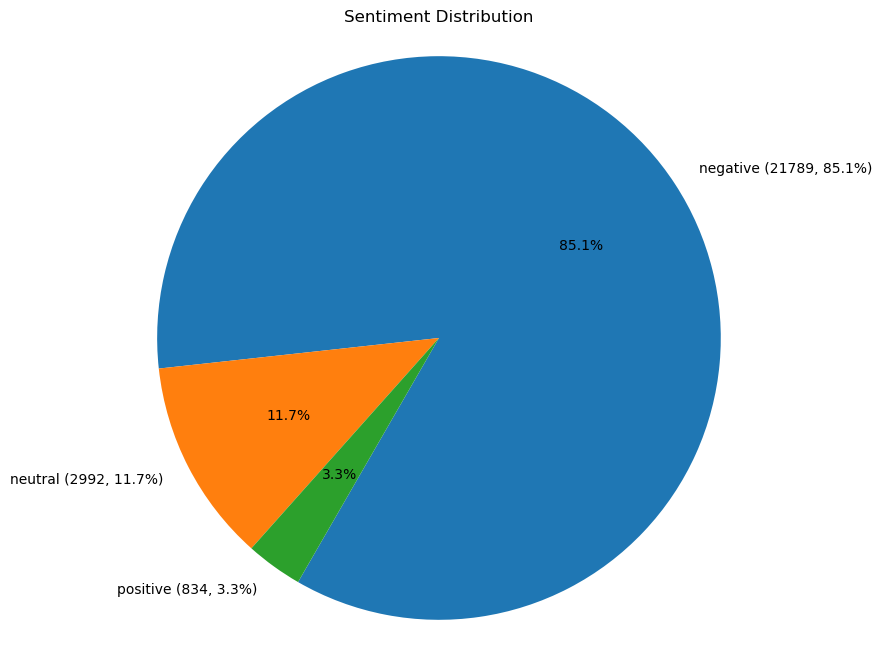

In [41]:
# Count values
sentiment_counts = df_r1['label_sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=[f"{label} ({count}, {count / sentiment_counts.sum():.1%})" 
            for label, count in sentiment_counts.items()],
    autopct='%1.1f%%',
    startangle=240
)
plt.title('Sentiment Distribution')
plt.axis('equal')  
plt.show()

In [17]:
df_r1 = df_r1[df_r1['label_sentiment']=='negative']

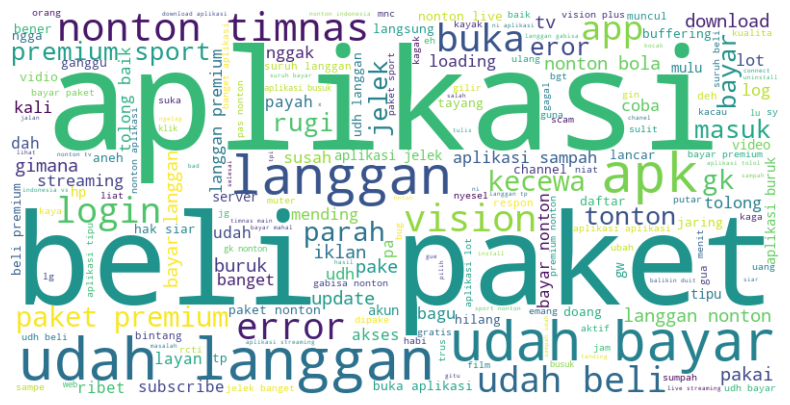

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of tokens into one list
all_words = [word for sublist in df_r1['review_text_token'] for word in sublist]

# Join all words into a single string
text = ' '.join(all_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

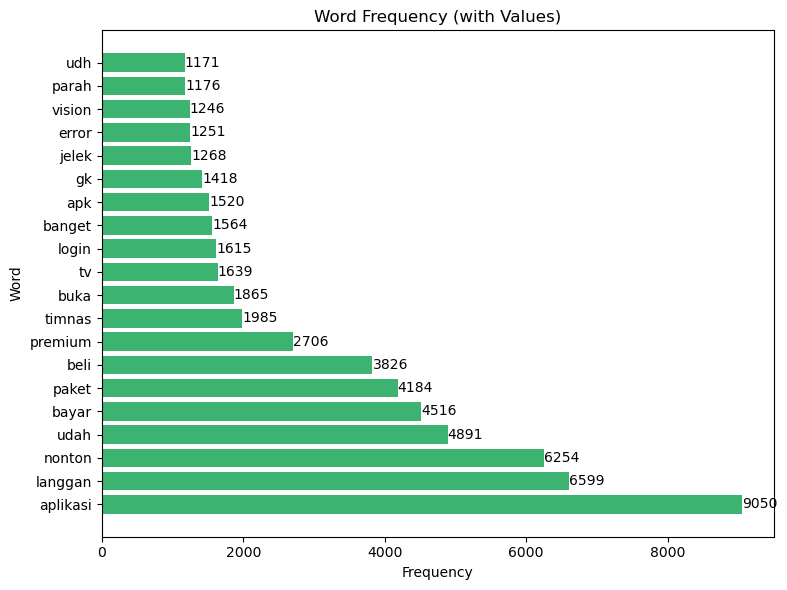

In [19]:
from collections import Counter

# Count word frequencies
word_counts = Counter(all_words)

# Convert to a DataFrame for easier plotting
freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
freq_df = freq_df.sort_values(by='count', ascending=False).head(20)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(freq_df['word'], freq_df['count'], color='mediumseagreen')

# Add value labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center')

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Word Frequency (with Values)')
plt.tight_layout()
plt.show()

In [20]:
df_lv = df[df['app_version_name']=='11.3.8 (3.2502031428) Vision+']
df_lv

,review_date,review_star,review_text,app_version_name,review_text_clean,label_sentiment,review_text_token
3054,2025-03-12,5,mantappp,11.3.8 (3.2502031428) Vision+,mantappp,positive,[mantappp]
3055,2025-03-12,1,Sadar diri lah lu vision pret; udah paling rib...,11.3.8 (3.2502031428) Vision+,sadar diri lah lu vision pret udah paling ribe...,negative,"[sadar, lu, vision, pret, udah, ribet, lot, ga..."
3056,2025-03-12,5,Aplikasi sangat bagus;langganan bkn cma bs non...,11.3.8 (3.2502031428) Vision+,aplikasi sangat baguslangganan bkn cma bs nont...,positive,"[aplikasi, baguslangganan, bkn, cma, bs, nonto..."
3057,2025-03-12,1,Aplikasi tidak bisa login. Yang ada lingkaran ...,11.3.8 (3.2502031428) Vision+,aplikasi tidak bisa login yang ada lingkaran p...,neutral,"[aplikasi, login, lingkar, putarputar]"
3058,2025-03-12,1,Buruk; paling buruk. Udah tahu dapet Bintang 1...,11.3.8 (3.2502031428) Vision+,buruk paling buruk udah tahu dapet bintang tap...,negative,"[buruk, buruk, udah, dapet, bintang, baik, uda..."
...,...,...,...,...,...,...,...
12507,2025-03-16,1,Sangat tidak rekomendasi,11.3.8 (3.2502031428) Vision+,sangat tidak rekomendasi,negative,[rekomendasi]
12789,2025-03-17,5,Aplikasinya keren;semoga semakin hari semakin ...,11.3.8 (3.2502031428) Vision+,aplikasinya kerensemoga semakin hari semakin j...,positive,"[aplikasi, kerensemoga, jayajaya]"
12794,2025-03-17,5,Aplikasi andalan nonton timnas. Dulu sering er...,11.3.8 (3.2502031428) Vision+,aplikasi andalan nonton timnas dulu sering err...,positive,"[aplikasi, andal, nonton, timnas, error, stabi..."
12797,2025-03-17,5,Mantap ce es nya 😍,11.3.8 (3.2502031428) Vision+,mantap ce es nya,positive,"[mantap, ce, es]"


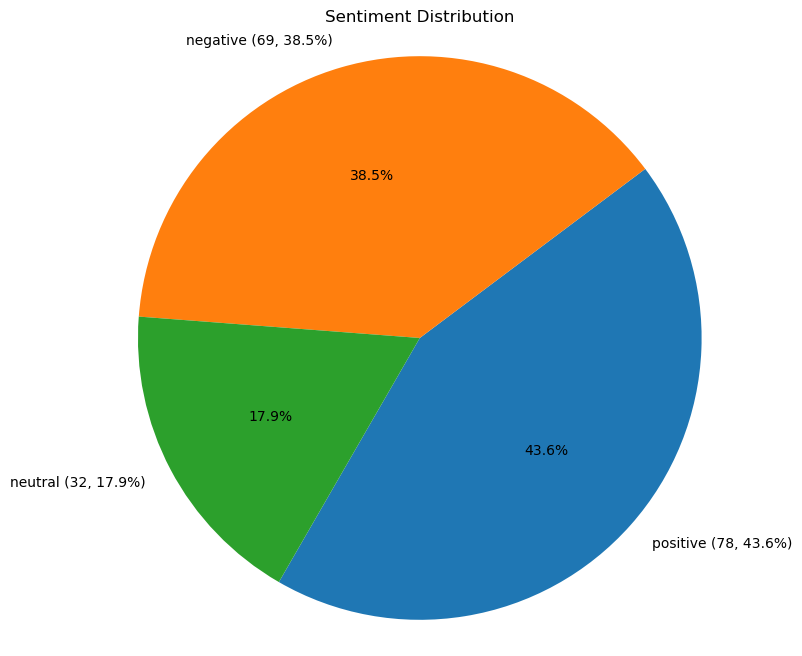

In [53]:
# Count values
sentiment_counts = df_lv['label_sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=[f"{label} ({count}, {count / sentiment_counts.sum():.1%})" 
            for label, count in sentiment_counts.items()],
    autopct='%1.1f%%',
    startangle=240
)
plt.title('Sentiment Distribution')
plt.axis('equal')  
plt.show()

In [22]:
df_lv['review_star'].value_counts()

5    85
1    66
2    12
3     9
4     7
Name: review_star, dtype: int64

In [25]:
df_lv_r1 = df_lv[df_lv['review_star']==1]
df_lv_r1

,review_date,review_star,review_text,app_version_name,review_text_clean,label_sentiment,review_text_token
3055,2025-03-12,1,Sadar diri lah lu vision pret; udah paling rib...,11.3.8 (3.2502031428) Vision+,sadar diri lah lu vision pret udah paling ribe...,negative,"[sadar, lu, vision, pret, udah, ribet, lot, ga..."
3057,2025-03-12,1,Aplikasi tidak bisa login. Yang ada lingkaran ...,11.3.8 (3.2502031428) Vision+,aplikasi tidak bisa login yang ada lingkaran p...,neutral,"[aplikasi, login, lingkar, putarputar]"
3058,2025-03-12,1,Buruk; paling buruk. Udah tahu dapet Bintang 1...,11.3.8 (3.2502031428) Vision+,buruk paling buruk udah tahu dapet bintang tap...,negative,"[buruk, buruk, udah, dapet, bintang, baik, uda..."
4438,2025-02-23,1,Aplikasi bagaimana ini login aja susah,11.3.8 (3.2502031428) Vision+,aplikasi bagaimana ini login aja susah,negative,"[aplikasi, login, susah]"
4441,2025-02-28,1,Aplikasi ngaco. Masa scan barcode tidak bs syn...,11.3.8 (3.2502031428) Vision+,aplikasi ngaco masa scan barcode tidak bs sync...,negative,"[aplikasi, ngaco, scan, barcode, bs, sync, hp,..."
...,...,...,...,...,...,...,...
12474,2025-03-15,1,Udah langganan kok masih ada iklan di tengah-t...,11.3.8 (3.2502031428) Vision+,udah langganan kok masih ada iklan di tengahte...,negative,"[udah, langgan, iklan, tengahtengah, balap, mo..."
12475,2025-03-15,1,sudah bayar bulanan tapi nonton siaran tv nasi...,11.3.8 (3.2502031428) Vision+,sudah bayar bulanan tapi nonton siaran tv nasi...,negative,"[bayar, bulan, nonton, siar, tv, nasional, res..."
12478,2025-03-15,1,Sebenernya bagus byk Chanel tv cuma sayanknya ...,11.3.8 (3.2502031428) Vision+,sebenernya bagus byk chanel tv cuma sayanknya ...,neutral,"[sebenernya, bagus, byk, chanel, tv, sayanknya..."
12507,2025-03-16,1,Sangat tidak rekomendasi,11.3.8 (3.2502031428) Vision+,sangat tidak rekomendasi,negative,[rekomendasi]


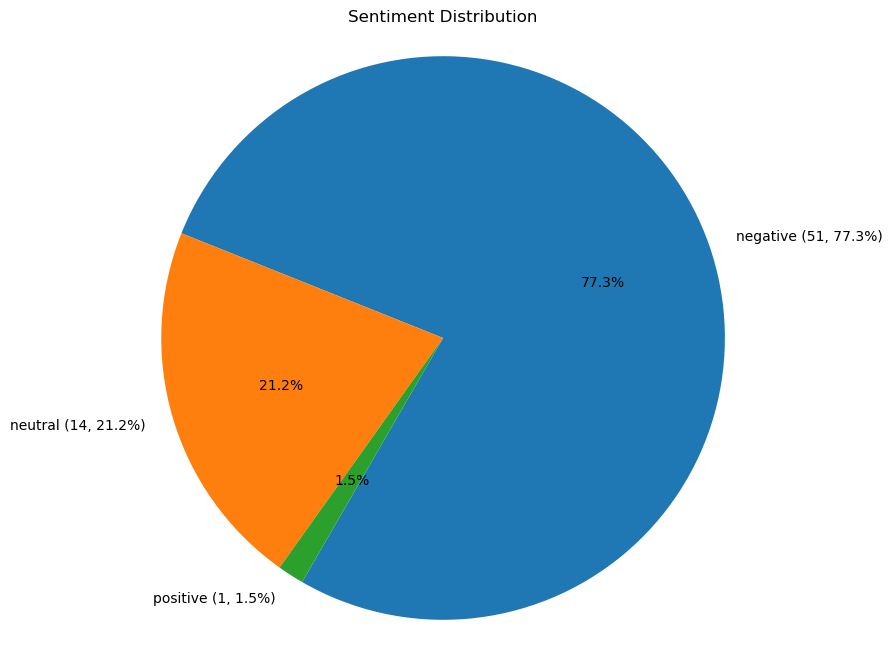

In [42]:
# Count values
sentiment_counts = df_lv_r1['label_sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=[f"{label} ({count}, {count / sentiment_counts.sum():.1%})" 
            for label, count in sentiment_counts.items()],
    autopct='%1.1f%%',
    startangle=240
)
plt.title('Sentiment Distribution')
plt.axis('equal')  
plt.show()

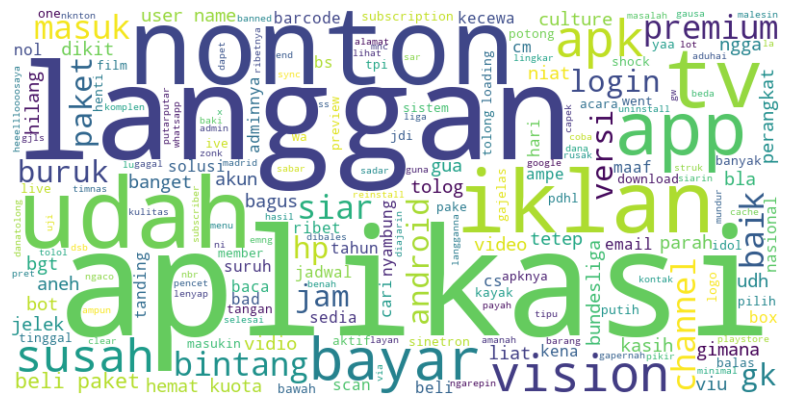

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of tokens into one list
all_words = [word for sublist in df_lv_r1['review_text_token'] for word in sublist]

# Join all words into a single string
text = ' '.join(all_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

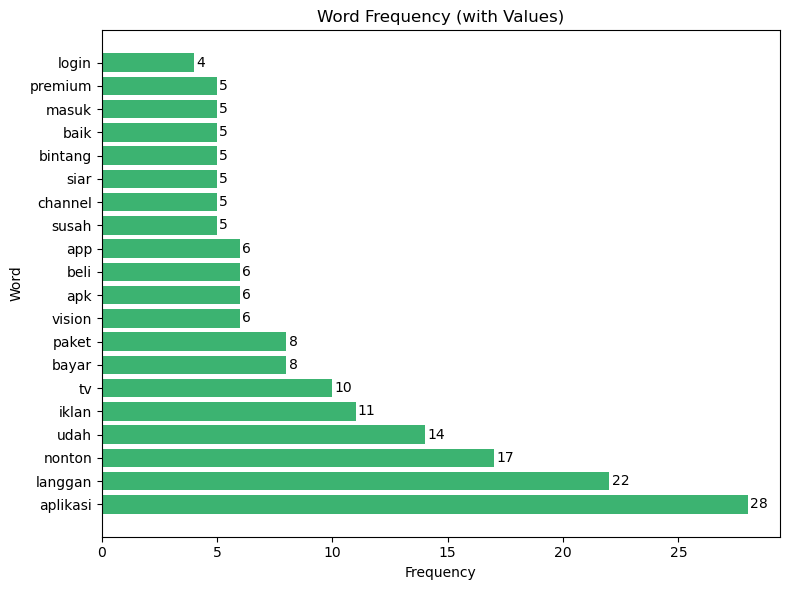

In [28]:
from collections import Counter

# Count word frequencies
word_counts = Counter(all_words)

# Convert to a DataFrame for easier plotting
freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
freq_df = freq_df.sort_values(by='count', ascending=False).head(20)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(freq_df['word'], freq_df['count'], color='mediumseagreen')

# Add value labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center')

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Word Frequency (with Values)')
plt.tight_layout()
plt.show()

In [44]:
# df = mn.review_classification(df=df,column_name='review_text')
# df

Pandas Apply:   0%|          | 0/38477 [00:00<?, ?it/s]

,review_date,review_star,review_text,app_version_name,review_text_clean,label_sentiment,review_text_token,topics
0,2022-10-23,1,Ini kenapa ya klo nonton episode yg sudah lama...,6.20.0,ini kenapa ya klo nonton episode yg sudah lama...,negative,"[nonton, episode, tab, menit, loadingnya, munc...",Content & Availability
1,2022-10-23,5,Sangat baguss sekali,,sangat baguss sekali,positive,[baguss],User Experience & Support
2,2022-10-23,1,Masih belum bisa nonton MotoGP live. Sudah gan...,6.20.0,masih belum bisa nonton motogp live sudah gant...,negative,"[nonton, motogp, live, ganti, provider, device...",Streaming Issues
3,2022-10-23,1,Loading mulu gx bsa ke buka padahal pke wifi a...,6.20.0,loading mulu gx bsa ke buka padahal pke wifi a...,negative,"[loading, mulu, gx, bsa, buka, pke, wifi, pake...",App Issues
4,2022-10-23,1,Mohon untuk perbaikan applikasinya karena sela...,6.20.0,mohon untuk perbaikan applikasinya karena sela...,negative,"[mohon, baik, applikasinya, muncul, unable, to...",Streaming Issues
...,...,...,...,...,...,...,...,...
38472,2024-04-29,1,Bad apps.,11.3.5 (1.2403231120) Vision+,bad apps,negative,"[bad, apps]",Others
38473,2024-04-29,1,2 kali langganan premium + sports 30 hari dan ...,11.3.5 (1.2403231120) Vision+,kali langganan premium sports hari dan semua n...,negative,"[kali, langgan, premium, sports, masuk, chat, ...",Transactions & Payments
38474,2024-04-29,1,Penipu....; refund uang kami. Jangan menipu ka...,11.3.5 (1.2403231120) Vision+,penipu refund uang kami jangan menipu kaya gin...,negative,"[tipu, refund, uang, tipu, kaya, gin, udah, su...",Transactions & Payments
38475,2024-04-29,1,Sangat buruk,,sangat buruk,negative,[buruk],User Experience & Support


In [45]:
df.to_excel('test_sentiment.xlsx', index = False)

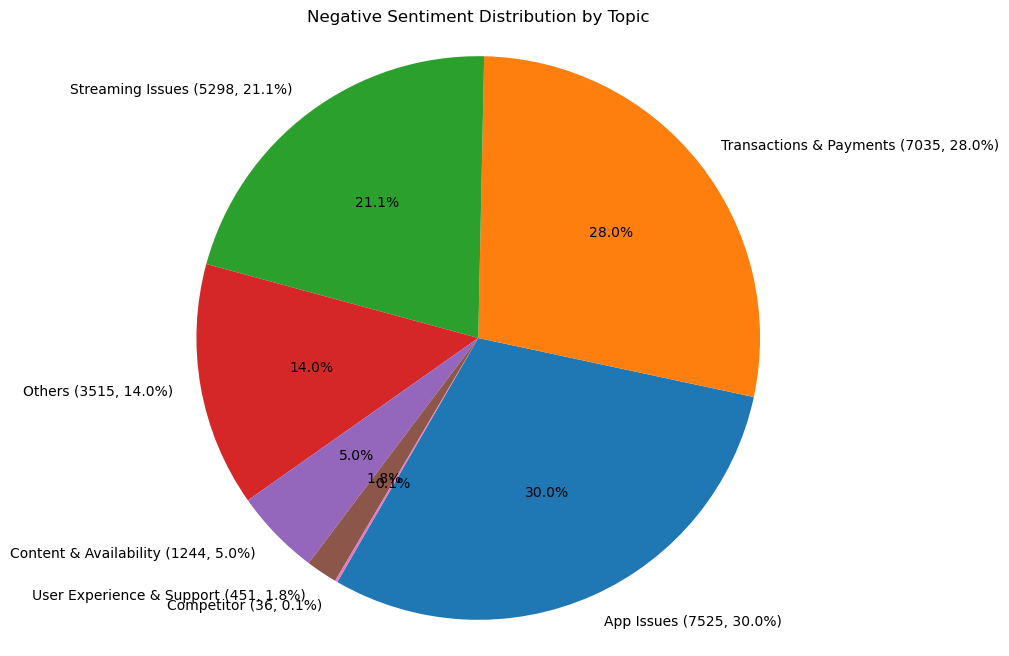

In [48]:
negative_df = df[df['label_sentiment'] == 'negative']
negative_counts = negative_df['topics'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    negative_counts,
    labels=[f"{topic} ({count}, {count / negative_counts.sum():.1%})" 
            for topic, count in negative_counts.items()],
    autopct='%1.1f%%',
    startangle=240
)
plt.title('Negative Sentiment Distribution by Topic')
plt.axis('equal')
plt.show()


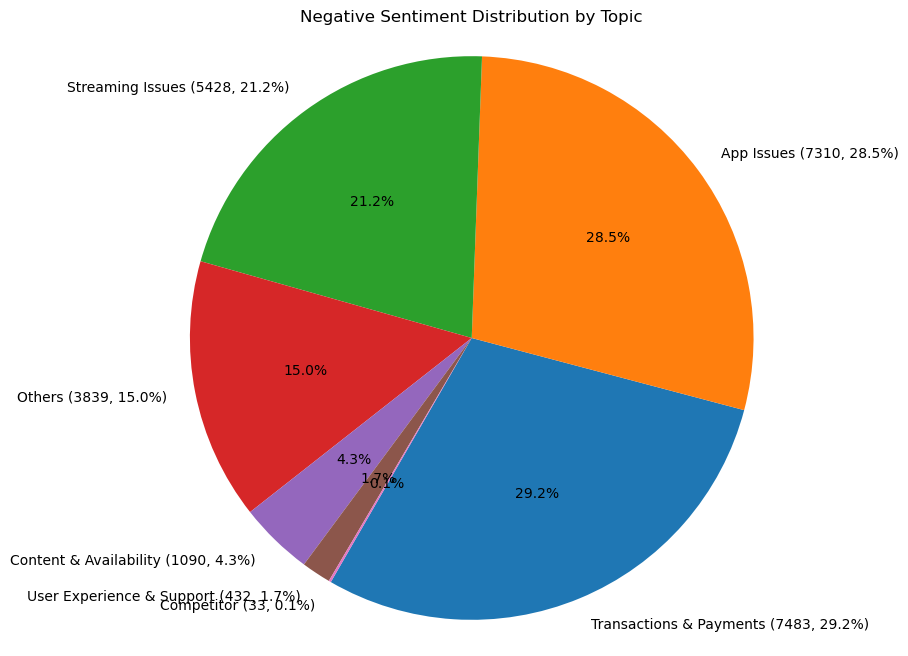

In [50]:
negative_df = df[df['review_star'] == 1]
negative_counts = negative_df['topics'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    negative_counts,
    labels=[f"{topic} ({count}, {count / negative_counts.sum():.1%})" 
            for topic, count in negative_counts.items()],
    autopct='%1.1f%%',
    startangle=240
)
plt.title('Negative Sentiment Distribution by Topic')
plt.axis('equal')
plt.show()


In [51]:
dwh_conn = vpluslib.connect_init(4)
query = Template('''
    SELECT 
        DATE(review_date) as review_date,
        review_star,
        review_text,
        app_version_name
    FROM analytics.gplayconsole_reviews
     ''')
    
query = query.render()
df_all = pd.read_sql(query, dwh_conn)

/tmp/ipykernel_489323/1641794575.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all = pd.read_sql(query, dwh_conn)


In [52]:
df_all

,review_date,review_star,review_text,app_version_name
0,2022-02-18,5,Menurutku bagus,
1,2022-02-18,5,,6.10.2
2,2022-02-18,5,,6.10.2
3,2022-02-18,4,Mmc tv ada gangguan Segera di betulkan,6.11.0
4,2022-02-18,1,gw kira beneran gratis eh ga taunya harus baya...,6.11.0
...,...,...,...,...
52207,2024-04-21,1,"Mau dikasih Rating; tdi malan aja tiba"" di blo...",11.3.5 (1.2403231120) Vision+
52208,2024-04-21,1,,11.3.5 (1.2403231120) Vision+
52209,2024-04-21,1,Pakai aplikasi ini hancur jelek lambat respond...,11.3.5 (1.2403231120) Vision+
52210,2024-04-21,5,Sangat bagus gambarnya dan hampir tdk pernah b...,11.3.5 (1.2403231120) Vision+
